<a href="https://colab.research.google.com/github/gonzalowho/DataScience/blob/master/100.Examen/2022/Ejercicio_Parcial_1_Bimestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Tipo Parcial

El ministerio de salud de la nación les solicita realizar un programa que les permita visualizar el estado de ciudadanos infectados con COVID-19 en todas sus variantes en un rango de fecha determinado y comparar esos resultados con los niveles de vacunación.
A su vez, se les solicita que realicen una compración con otro(s) país(es). (Seleccionar como máximo 2 adicionales)

Para ello, un analista le provee los siguientes archivos.

[Vacunación Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv)

[Casos COVID Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv)


Consideraciones:

* Rango de Fechas desde 01/01/2021 a 15/01/2021
* Importar los archivos y trabajarlos como diccionarios o dataframes. El caracter delimitador de los archivos es el **';'**
* Realizar al menos 4 charts que representen la información solicitada
* Utilizar funciones
* Generar un archivo que posea la siguiente estructura de datos dscriminado por el rango de fechas.
```
ID:{
'país':value,
'fecha':value,
'nuevos_casos':value,
'nuevas_muertes':value,
'total_vacunados':value
}
```
* Documentar cada paso con bloques de texto adicionalmente a notas en el código
* Presentar por pantalla el total acumulado de infectados y de vacunados en el rango de fechas solicitado
* Proveer una breve conclusión como parte del análisis 





## TIPS

In [ ]:
import csv
file = ('./sample_data/country_vaccinations.csv')
covid_vaccines={}

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';') #Delimitador ;
    line_count = 0
    for row in csv_reader:
      print(row)

In [ ]:
import csv
file = ('./sample_data/owid-covid-data.csv')
covid_cases={}

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';')
    line_count = 0
    for row in csv_reader:
      print(row)

In [ ]:
var = '1.0'

split = var.split('.')[0] # Dividir cadena de caracteres para eliminar los caracteres detras del .

print(var)
print(int(split))

---


## Carga de datos

In [18]:





# Ingrese código aquí
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num

df = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv',sep=';')
df1 = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv')

#df3 = df[(df['date'] >= '01/01/2021') & (df['date'] <= '15/01/2021')]




#arg_df = filtered_df[filtered_df['iso_code']==('ARG')]
#usa_df = filtered_df[filtered_df['iso_code']==('BRA')]
#chn_df = filtered_df[filtered_df['iso_code']==('CHN')]





## Limpieza de datos

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df3 = df[(df['date'] >= '01/01/2021') & (df['date'] <= '15/01/2021')]

df2 = df1[(df1['date'] >= '2021-01-01') & (df1['date'] <= '2021-01-15')]

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Transformación de datos

In [4]:
country_list = ['ITA','ARG','CHN']


df4 = df2[df2['iso_code'].isin(country_list)]
df5 = df3[df3['iso_code'].isin(country_list)]
filtered_df = df4[["iso_code","location","total_cases","new_cases","new_deaths","date", "total_vaccinations"]]

lista_dates = filtered_df["date"].unique()

def df_pais (df, pais, campo):
  df1 = df[df['iso_code']==(pais)]
  cases = df1[campo].tolist()
  return cases, df1

arg_cases, arg_df = df_pais(filtered_df, 'ARG','new_cases')
bra_cases, bra_df = df_pais(filtered_df, 'ITA','new_cases')
chn_cases, chn_df = df_pais(filtered_df, 'CHN','new_cases')

arg_vac, arg_vac_df = df_pais(df3, 'ARG','daily_vaccinations' )
bra_vac , bra_vac_df= df_pais(df3, 'ITA','daily_vaccinations' )
chn_vac , chn_vac_df= df_pais(df3, 'CHN','daily_vaccinations' )


## Análisis y Visualizaciones

*Ingrese su análisis aquí*


array([737791., 737792., 737793., 737794., 737795., 737796., 737797.,
       737798., 737799., 737800., 737801., 737802., 737803., 737804.,
       737805.])

<Figure size 432x288 with 0 Axes>

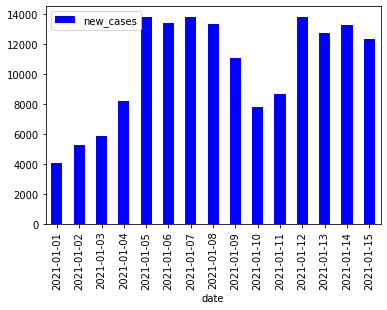

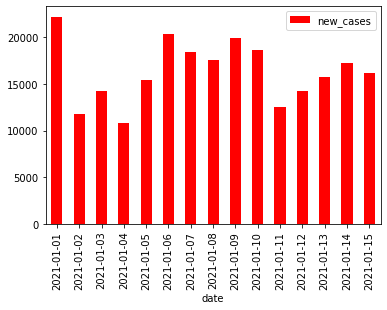

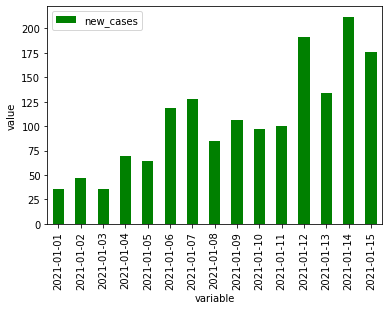

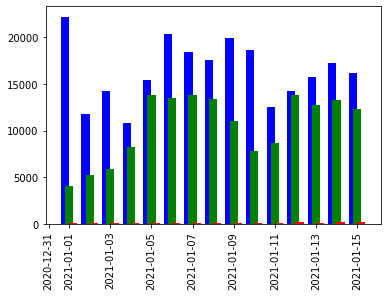

In [39]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num

plt.figure()
arg_df.plot(kind='bar',x='date',y='new_cases',color='blue')
bra_df.plot(kind='bar',x='date',y='new_cases',color='red')
chn_df.plot(kind='bar',x='date',y='new_cases',color='green')
plt.xlabel('variable')
plt.ylabel('value')

plt.show()




x=[]
for i in lista_dates:
  x.append(datetime.strptime(i,'%Y-%m-%d'))
x = date2num(x)

ax = plt.subplot(111)
ax.bar(x-0.2, dic["ita"], width=0.4, color='b', align='center')
ax.bar(x, dic["arg"], width=0.4, color='g', align='center')
ax.bar(x+0.2, dic["chn"], width=0.4, color='r', align='center')
ax.xaxis_date()
plt.xticks(rotation=90)
plt.show()

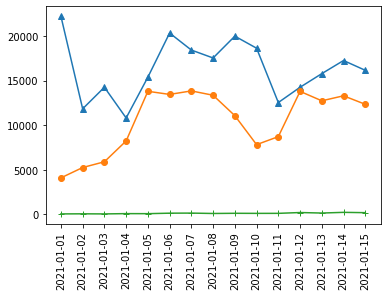

In [26]:
# Ingrese#arg_df = filtered_df[filtered_df['iso_code']==('ARG')]
#usa_df = filtered_df[filtered_df['iso_code']==('ITA')]
#chn_df = filtered_df[filtered_df['iso_code']==('CHN')]
#df4 = filtered_df[filtered_df['iso_code'].isin(country_list)]
#arg_cases = arg_df["new_cases"].tolist()
##bra_cases = usa_df["new_cases"].tolist()
#chn_cases = chn_df["new_cases"].tolist()
lista_dates = arg_df["date"].tolist()
#ist_of_single_column = df['DOB'].tolist()


dic={"ita":bra_cases, "arg":arg_cases, "chn":chn_cases }
dic

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.subplots()
ax.plot(lista_dates, dic["ita"], marker = '^')
ax.plot(lista_dates, dic["arg"], marker = 'o')
ax.plot(lista_dates, dic["chn"], marker = '+')
plt.xticks(rotation=90)
plt.show()

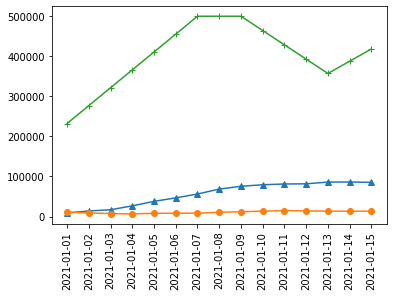

In [58]:
#arg_vac, arg_vac_df = df_pais(df3, 'ARG','daily_vaccinations' )
#bra_vac , bra_vac_df= df_pais(df3, 'BRA','daily_vaccinations' )
#chn_vac , chn_vac_df= df_pais(df3, 'CHN','daily_vaccinations' )

dic={"ita":bra_vac, "arg":arg_vac, "chn":chn_vac }
dic

fig = plt.figure()
ax = fig.subplots()
ax.plot(lista_dates, dic["ita"], marker = '^')
ax.plot(lista_dates, dic["arg"], marker = 'o')
ax.plot(lista_dates, dic["chn"], marker = '+')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Ingrese código aquí

## Conclusión

*Ingrese conclusión aquí*

In [ ]:
# Ingrese código aquí

## Almacenamiento de resultados

In [8]:
filtered_df.to_json('./sample_data/resultado.json', orient = 'records')